# Clasificador Euclidiano (Análisis de Discriminante Lineal)

## La Clasificación Lineal
En un problema de _clasificación_ se pretende encontrar la _clase_ a la que pertence un conjunto de datos,
de acuerdo a otro conjunto de datos ya _etiquetado_. A este proceso se le conoce como **clasificación supervisada.**

En ciertas ocasiones, el conjunto de datos está separado de tal forma que una _línea recta_ lo puede separar,
y la clasificación es tan simple como asignar una clase o a otra dependiendo del lado en el que se encuentra
el conjunto de datos. Cuando existe esta separación se conoce como un problema de **clasificación lineal**,
dado que la frontera de seperación es una _línea recta_.

## Motivación de clasificadores lineales
Los _clasificadores lineales_ constituyen una parte fundamental en el mundo de la Inteligencia Computacional
dado que las _relaciones lineales_ son los modelos mejor estudiados, los más robustos y los más eficientes
computacionalmente; es muy común siempre aproximar o modificar los datos para que se puedan aplicar diferentes
_clasificadores lineales._

## Teoría probabilística del Discriminante Lineal
En general, el **clasificador euclidiano** es el caso específico de un clasificador más general, el **discriminante lineal.**
En esta sección se pretende ahondar más en la teoría de este modelo; en el transcurso se omitirán muchas demostraciones
y se asumen más cosas, por lo que se remite al lector a las referencias de este documento.

El _discriminante lineal_ pretende siempre encontrar el componente más grande dada una _función discriminante_ $\delta_k (x)$
por cada clase $k$ y dado un conjunto de valores $x$, tal que el _discriminante lineal_ clasifica de acuerdo a

$$G(x) = \text{argmax}_{k \in K}{\delta_k (x)}$$

para todas las clases $K$ del conjunto de datos.

Para encontrar la función $\delta_k (x)$ se asume que se conoce la probabilidad _a priori_ $\pi_k$ de cada clase, 
así como la probabilidad condicional de cada clase, $f_k (x).$ Utilizando el Teorema de Bayes se encuentra la probabilidad
_a posteriori_ del conjunto de datos, esto es

$$Pr(G=k|X=x) = \frac{f_k(x) \pi_k}{\sum_{l=1}^{K} f_l(x) \pi_l}$$

donde además se sabe que $\sum_{k=1}^{K} \pi_k = 1$.

Sin embargo, se llega al punto donde se deben asumir ciertas cosas, en particular, ¿qué forma tiene $f_k (x)$? Se asumió que
se conoce, pero en realidad no siempre es cierto, por lo que se debe de modelar de alguna forma. En general, el modelo
del _discriminante lineal_ dice que $f_k (x)$ se modele como una densidad Gaussiana multivariada, esto es

$$f_k (x) = \frac{1}{(2\pi)^{p/2}|\mathbf{\Sigma_k}|^{1/2}} e^{-\frac{1}{2}(x-\mu_k)^T \mathbf{\Sigma_k}^{-1} (x-\mu_k)}$$

donde $p$ es la dimensión del espacio donde se está trabajando, $\mathbf{\Sigma_k}$ y $\mu_k$ son la matriz de covarianza 
y la media de la clase $k$, respectivamente. Esta es una hipótesis fuerte, dado que no siempre es cierto que se puede modelar
$f_k (x)$ de esta forma, pero cuando el número de datos es muy grande se puede apelar al Teorema del Límite Central y es
cuando el _discriminante lineal_ tiene más sentido.

La última hipótesis que se tiene que asumir para tener el modelo completo es respecto a la matriz de covarianza, en particular
se asume que todas las clases comparten la misma matriz de covarianza tal que $\mathbf{\Sigma_k} = \mathbf{\Sigma}\ \forall k.$
Esta hipótesis es lo que le da el nombre al método, y es la hipótesis clave de este modelo dado que bajo esta hipótesis la 
_función discriminante_ se hace _lineal_ en $x$, pues siguiendo del Teorema de Bayes planteado anteriormente se obtiene que

$$\delta_k (x) = x^T \mathbf{\Sigma}^{-1} \mu_k - \frac{1}{2} \mu_k^T \mathbf{\Sigma}^{-1} \mu_k + \log{\pi_k} $$

y viendo este modelo es donde se puede observar claramente que la ecuación es _lineal_ en $x$, no es un polinomio de orden superior
ni algún tipo de función no lineal.

### El Clasificador Euclidiano
Siguiendo el modelo anterior existe un caso particular conocido coloquialmente como el **clasificador euclidiano** o 
**clasificador de mínima distancia**. En este caso se tienen las siguientes dos condiciones:

1. La matriz de covarianza es _eférica_ tal que $\mathbf{\Sigma} = \sigma^2 \mathbf{I}$, es decir, no hay correlación entre las
   variables, y la matriz de covarianza se hace diagonal.

2. Las probabilidades _a priori_ de cada clase son iguales, tal que $\pi_k = \pi\ \forall k$.

Es bajo estas condiciones que se pueden unir los centroides de cada conjunto de puntos que constituyen una clase y se pueden
dibujar los bisectores perpendiculares. Esto es lo que se realiza en la primera parte de este documento, y posteriormente
se implementa el modelo general para cualquier tipo de conjuntod de puntos.

In [26]:
# Ajustar tamaño de las figuras
import matplotlib
matplotlib.rcParams["figure.figsize"] = (25, 14)

# Importar las demás librerías
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definir el conjunto de colores de Seaborn
sns.set()

## Implementación conceptual
Como se mencionó en la introducción, esta primera parte consta de implementar el clasificador de forma _conceptual_, esto implica construir el clasificador de primeros principios. Recordando la teoría, el propósito es construir los bisectores perpendiculares que unen a los centroides del conjunto de puntos que constituyen a cada clase.

Los pasos a seguir son los siguientes:

1. Construir o generar un conjunto de puntos de prueba que constituyan dos o más clases.

2. Calcular las medias de cada clase y graficarlas.

3. Construir una línea recta que pase por las medias de cada clase.

4. Usando esa línea recta, construir la línea perpendicular y definir esta línea como la _frontera de decisión_.

In [27]:
# Paso 1.
# Crear un conjunto de datos con dos clases linealmente separables
X, y = make_blobs(n_samples=1000, centers=2, random_state=123)
# Encontrar las clases únicas generadas
etiquetas_clases = list(set(y))
# Definir los dos conjuntos según estas clases
X_1 = X[y == etiquetas_clases[0]]
X_2 = X[y == etiquetas_clases[1]]

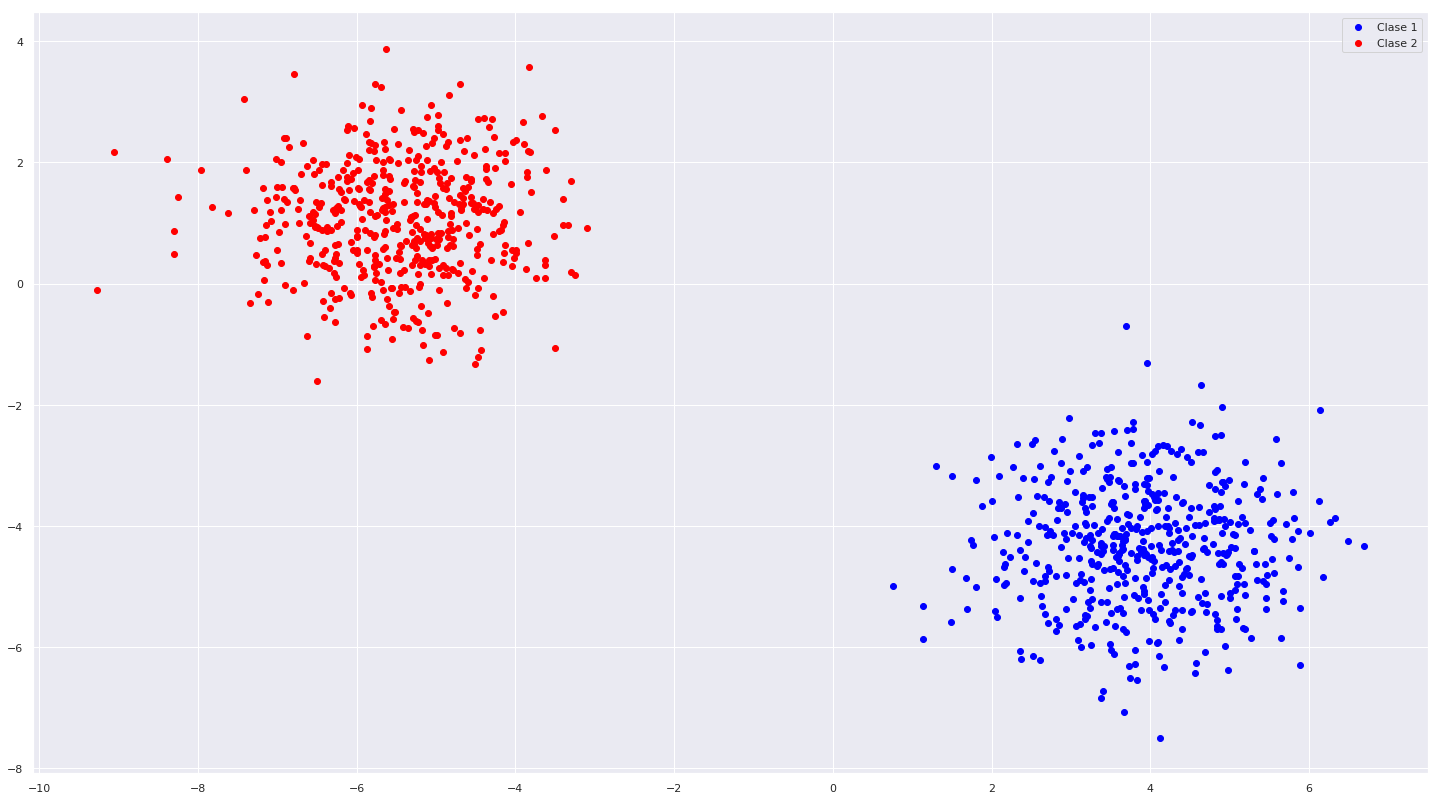

In [28]:
# Graficar los datos encontrados
plt.scatter(X_1[:, 0], X_1[:, 1], color="blue", label="Clase 1")
plt.scatter(X_2[:, 0], X_2[:, 1], color="red", label="Clase 2")
plt.legend(loc="best")

In [29]:
# Paso 2.
# Calcular las medias artiméticas principales
mean_x_1 = X_1.mean(axis=0)
mean_x_2 = X_2.mean(axis=0)

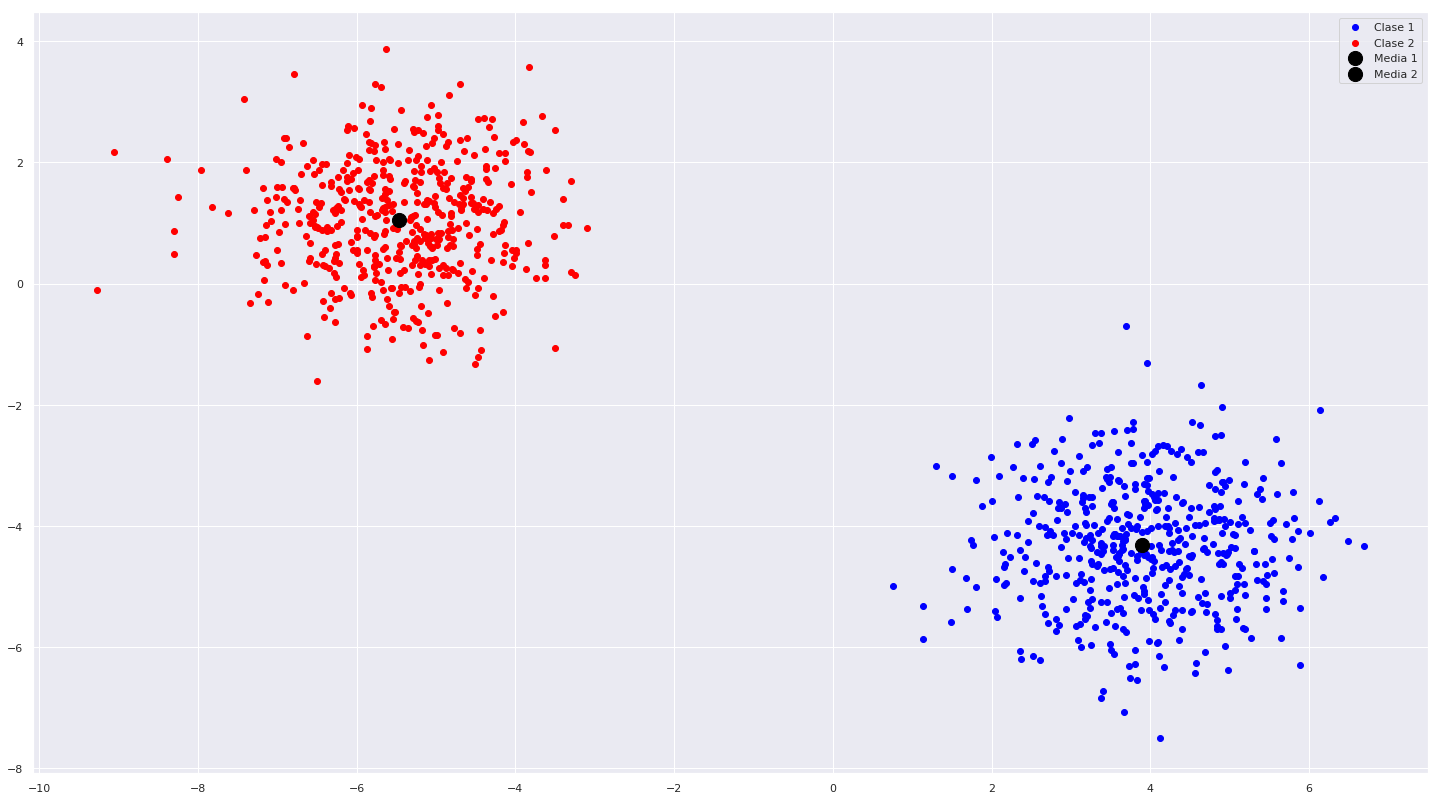

In [30]:
# Grafica estos datos
plt.scatter(X_1[:, 0], X_1[:, 1], color="blue", label="Clase 1")
plt.scatter(X_2[:, 0], X_2[:, 1], color="red", label="Clase 2")
plt.scatter(*mean_x_1, color="black", label="Media 1", s=200)
plt.scatter(*mean_x_2, color="black", label="Media 2", s=200)
plt.legend(loc="best")

In [31]:
# Paso 3.
# Calcular la recta que pasa por las medias
resta = mean_x_2 - mean_x_1
pendiente = resta[1] / resta[0]
ordenada = mean_x_1[1] - (pendiente * mean_x_1[0])

In [32]:
# Paso 4.
# La ordenada de la recta decisión es el punto intermedio entre la distancia
punto_medio = (mean_x_1 + mean_x_2) / 2
ordenada_dec = punto_medio[1] + (punto_medio[0] / pendiente)
print(punto_medio)

[-0.79056481 -1.63256943]


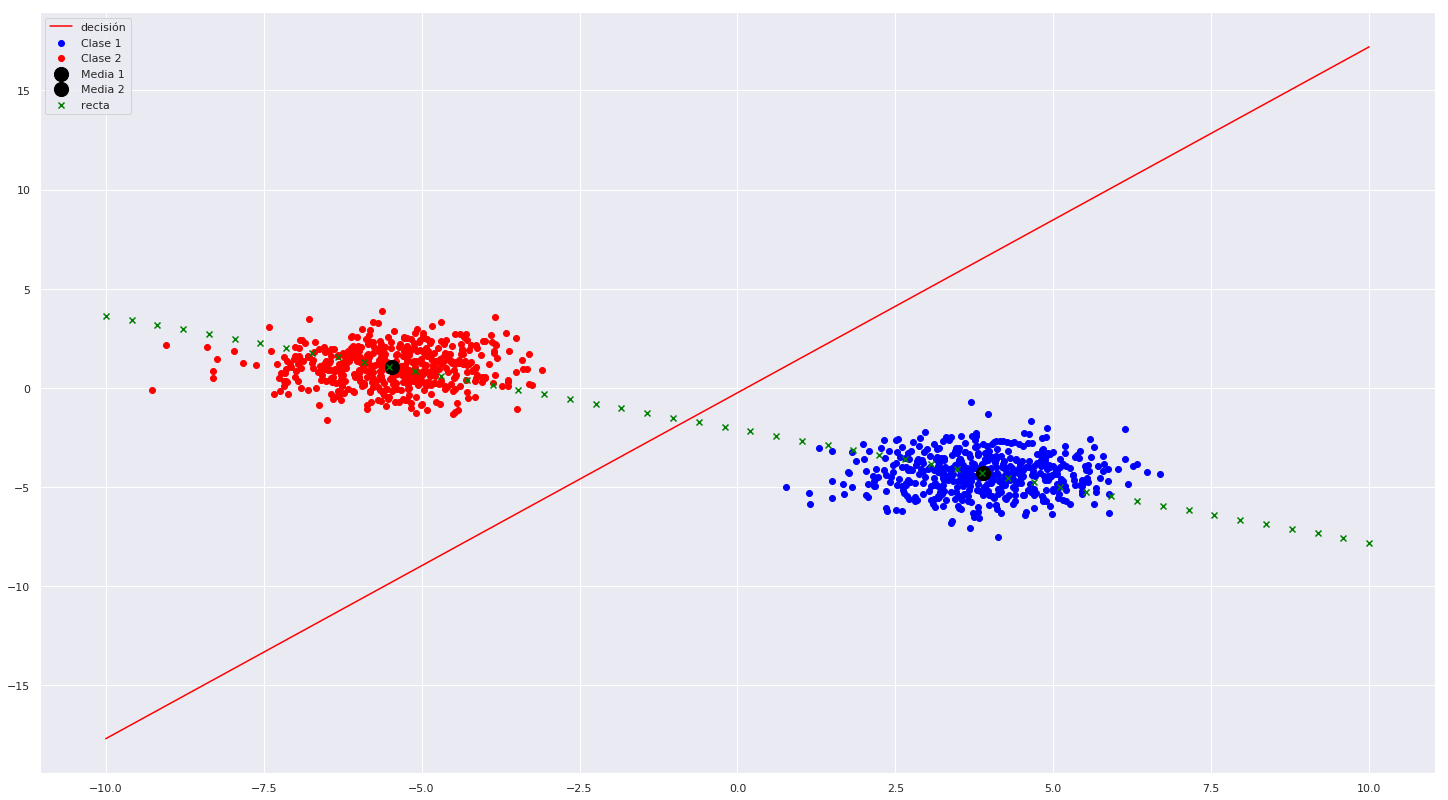

In [33]:
# Grafica estos datos
plt.scatter(X_1[:, 0], X_1[:, 1], color="blue", label="Clase 1")
plt.scatter(X_2[:, 0], X_2[:, 1], color="red", label="Clase 2")
plt.scatter(*mean_x_1, color="black", label="Media 1", s=200)
plt.scatter(*mean_x_2, color="black", label="Media 2", s=200)

# Y ahora graficar la línea perpendicular, la frontera de decisión
x_vals = np.linspace(-10, 10)
plt.scatter(
    x_vals, pendiente * x_vals + ordenada, label="recta", color="green", marker="x"
)
plt.plot(x_vals, (-x_vals / pendiente) + ordenada_dec, label="decisión", color="red")
plt.legend(loc="best")

Como se puede ver, la línea roja es la _frontera de decisión_ y claramente separa ambas clases. Con esta línea se puede decidir si pertenece a la clase axul o roja dependiendo de qué lado esté el conjunto de datos a ser clasificado.

## Implementación real
Esta implementación es la teórica, implementando las ecuaciones tal como están presentadas en la introducción. Es importante notar que para calcular la matriz inversa de la matriz de covarianza se emplea el método de la pseudoinversa de Moore-Penrose en caso de que la matriz se singular.

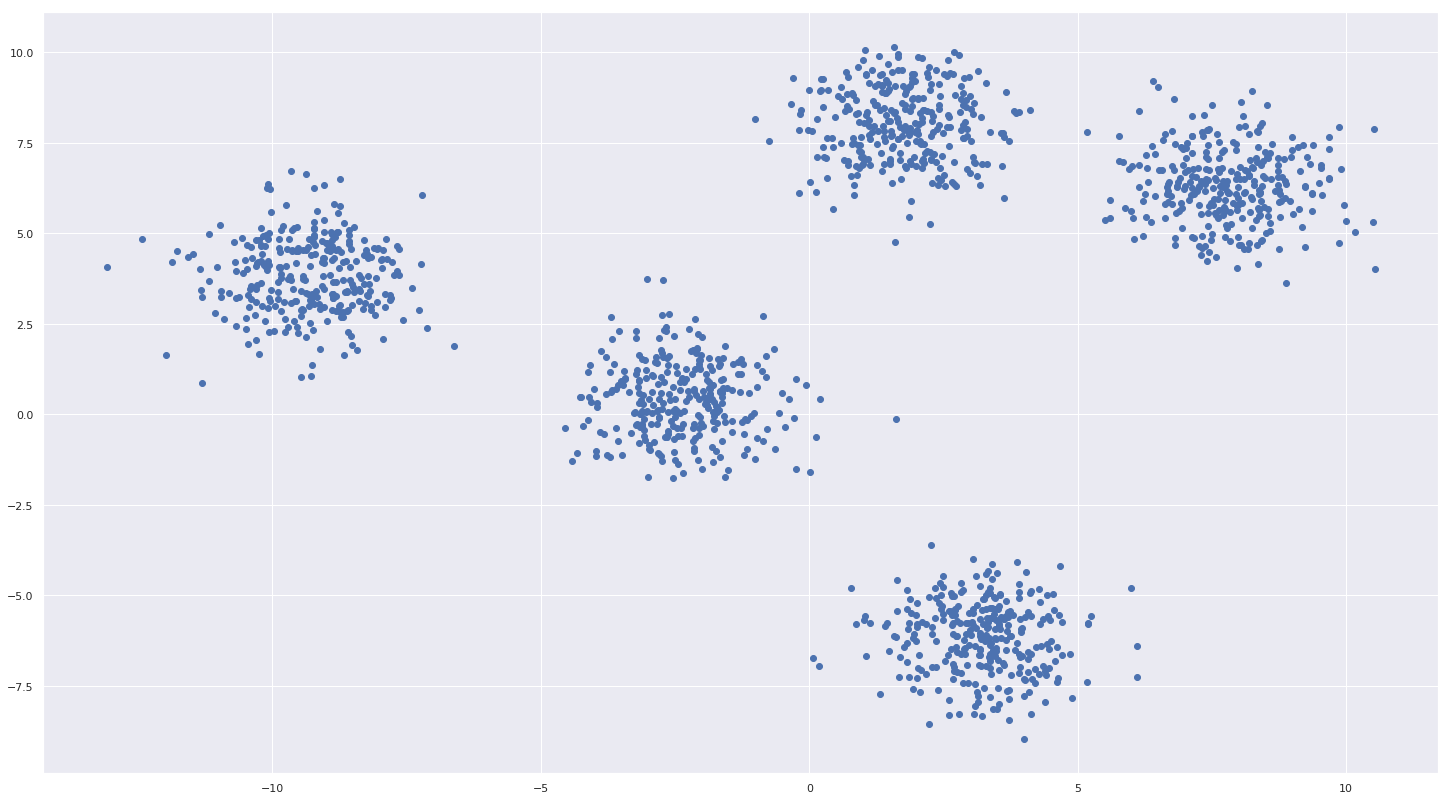

In [44]:
X, y = make_blobs(1500, n_features=2, centers=5, random_state=20)
plt.scatter(X[:, 0], X[:, 1])

In [45]:
class DiscriminanteLineal:
    
    def __init__(self):
        self.inv_covarianza = None
        self.medias = list()
        self.a_priori = np.array([])
        self.resultado_parcial = list()

    def inicializar(self, datos, clases):
        # Inicializar los valores de las probabilidades a priori
        valores_clases = list(set(clases))
        total_puntos = len(datos)
        for i in valores_clases:
            self.a_priori = np.append(
                self.a_priori, len(clases[clases == i]) / total_puntos
            )
            # Calcular las medias de cada clase
            self.medias.append(datos[clases == i].mean(axis=0))

        # Calcular la matriz de covarianza, es la misma para todos los datos
        covarianza = np.cov(datos, rowvar=False)
        # También calcular la inversa de la matriz de covarianza
        self.inv_covarianza = np.linalg.pinv(covarianza)
        self.medias = np.array(self.medias)

    def entrenamiento(self, datos, clases):
        # Convertir a np.array
        datos = np.array(datos)
        # Se inicializan todos los valores
        self.inicializar(datos, clases)
        # Se calcula el primer producto interno
        for i in self.medias:
            self.resultado_parcial.append(-0.5 * (i.T @ (self.inv_covarianza @ i)))

        self.resultado_parcial = np.array(self.resultado_parcial)
        # Sumar el logaritmo de las probabilidades a priori
        self.resultado_parcial += np.log(self.a_priori)

    def prediccion(self, datos):
        # Convertir a np.array
        datos = np.array(datos)
        # Crear el arreglo vacío con el tamaño correcto
        clasificacion = np.zeros((len(datos), len(self.medias)))
        # Utilizar el resultado entrenado
        for l, i in enumerate(self.medias):
            multiplicacion = self.inv_covarianza @ i
            clasificacion[:, l] = (datos @ multiplicacion) + self.resultado_parcial[l]

        return np.argmax(clasificacion, axis=1)

In [46]:
# Se separa el conjunto de datos en prueba y entrenamiento, 70-30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [47]:
# Crear el discriminantes
lda = DiscriminanteLineal()
lda.entrenamiento(X_train, y_train)
resultado = lda.prediccion(X_test)
# Mostrar el resultado de la clasificación
print(classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        81

   micro avg       1.00      1.00      1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



Como se esperaba, la clasificación es perfecta dado que el conjunto de datos generados es totalmente linealmente separable, si la clasificación no fuera tan exacta entonces existe algún error en la implementación.

## Implementación de `scikit-learn`
La excelente librería de Python `scikit-learn` tiene implementado el discriminante lineal que se puede visitar en la
[documentación oficial.](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn-discriminant-analysis-lineardiscriminantanalysis)
Esta implementación tiene muchas más opciones, como el tipo de método numérico para encontrar la matriz de covarianza, entre otras cosas. Aquí se muestra la implementación para el mismo ejemplo mostrado anteriormente.

In [49]:
# Crear el clasificador con las opciones default
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
resultado = clf.predict(X_test)
print(classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        81

   micro avg       1.00      1.00      1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



## Referencias
1. [_The Elements of Statistical Learning_. Hastie, Tibshirani & Friedman, 2004](https://books.google.com.mx/books?id=yPfZBwAAQBAJ&hl=es&source=gbs_navlinks_s)

2. [Linear Discriminant Analysis](https://sebastianraschka.com/Articles/2014_python_lda.html)